In [1]:
# Importamos las librerías necesarias para nuestro código
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

In [2]:
#Leemos el archivo 
df0 = pd.read_csv("vid.dat")

In [3]:
#Creamos una columna para la fecha como variable date
df0['TIMESTAMP'] = pd.to_datetime(df0.apply(lambda x: x['TIMESTAMP'], 1), dayfirst=True)

In [4]:
#seleccionamos solo las columnas de temperatura y tiempo y eliminamos las demas
df0 = df0.rename(columns={'TIMESTAMP': 'Fecha','AirTC_Avg':'TempA'})

In [5]:
df0=df0[(df0['Fecha']>'2018-11-1')]

In [6]:
# Primero creamos una columna para ordenar de menor a mayor los tiempos
df0['Hora'] = df0['Fecha'].dt.hour
df0['Día'] = df0['Fecha'].dt.day
df0['Mes'] = df0['Fecha'].dt.month
df0['Año'] = df0['Fecha'].dt.year

In [7]:
# Eliminamos la columna de Fecha
f=len(df0)
df0.index = np.arange(0,f)
df0 = df0.drop(["Fecha"], 1)

In [8]:
# Agrupamos la Temperatura por Año, Mes, Día y Hora, y sacamos un promedio para cada hora.
df0["TempA"]=df0.groupby(["Año","Mes","Día","Hora"])["TempA"].transform("mean")

In [113]:
df1 = df.groupby([df0['Fecha'].dt.year,df['Fecha'].dt.month,df['Fecha'].dt.day,df['Fecha'].dt.hour]).mean()

In [9]:
# Creamos dos columnas para Temperatura máxima y mínima.
df0["Tmin"]=df0.groupby(["Año","Mes","Día"])["TempA"].transform("min")
df0["Tmax"]=df0.groupby(["Año","Mes","Día"])["TempA"].transform("max")
df0["Hora"]=df0.Hora
df0["Día"]=df0.Día
df0["Mes"]=df0.Mes
df0["Año"]=df0.Año
df = df0[['TempA','Tmin','Tmax','Hora','Día','Mes','Año']]
df.head()

,TempA,Tmin,Tmax,Hora,Día,Mes,Año
0,8.624,6.806833,28.621667,0,1,11,2018
1,8.624,6.806833,28.621667,0,1,11,2018
2,8.624,6.806833,28.621667,0,1,11,2018
3,8.624,6.806833,28.621667,0,1,11,2018
4,8.624,6.806833,28.621667,0,1,11,2018


In [10]:
# Dropeamos las filas duplicadas, así obtenemos las temperaturas por hora
df=df.drop_duplicates()
f=len(df)
df.index = np.arange(0,f)
df.head()

,TempA,Tmin,Tmax,Hora,Día,Mes,Año
0,8.624000,6.806833,28.621667,0,1,11,2018
1,8.493333,6.806833,28.621667,1,1,11,2018
2,8.690000,6.806833,28.621667,2,1,11,2018
3,8.846667,6.806833,28.621667,3,1,11,2018
4,7.397500,6.806833,28.621667,4,1,11,2018


In [11]:
#Calculamos el indice UF24
count=[]
for i in range (0,len(df)):
    z=df.TempA[i]
    if (z<1.4) :
        j=0
    if (z>=1.5 and z<=2.4) :
        j=0.5   
    if (z>=2.5 and z<=9.1) :
        j=1
    if (z>=9.2 and z<=12.4) :
        j=0.5  
    if (z>=12.5 and z<=15.9) :
        j=0
    if (z>=16 and z<=18) :
        j=-0.5
    if (z>18) :
        j=-1
    count.append(j)
df["UF24"]=count
df.head(10)

,TempA,Tmin,Tmax,Hora,Día,Mes,Año,UF24
0,8.624000,6.806833,28.621667,0,1,11,2018,1.0
1,8.493333,6.806833,28.621667,1,1,11,2018,1.0
2,8.690000,6.806833,28.621667,2,1,11,2018,1.0
3,8.846667,6.806833,28.621667,3,1,11,2018,1.0
4,7.397500,6.806833,28.621667,4,1,11,2018,1.0
5,7.289833,6.806833,28.621667,5,1,11,2018,1.0
6,6.806833,6.806833,28.621667,6,1,11,2018,1.0
7,8.110167,6.806833,28.621667,7,1,11,2018,1.0
8,14.960000,6.806833,28.621667,8,1,11,2018,0.0
9,19.710000,6.806833,28.621667,9,1,11,2018,-1.0


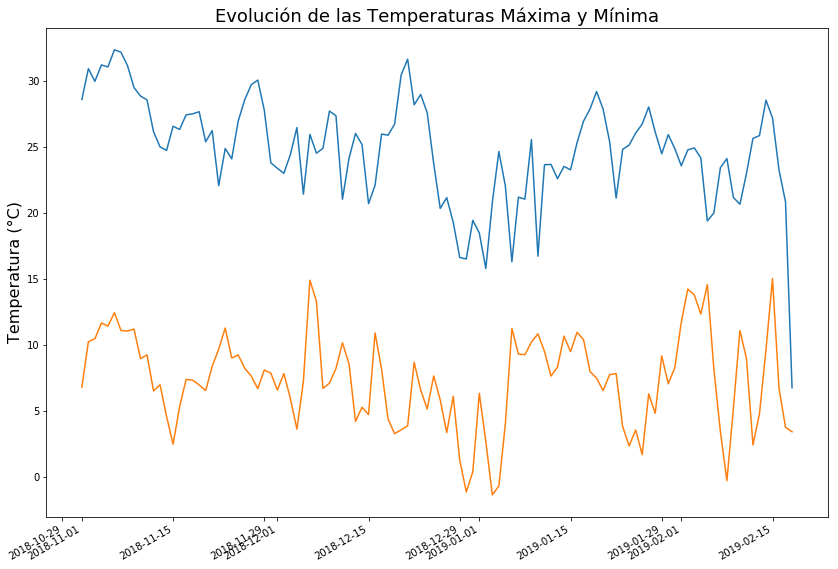

In [12]:
# Graficamos la evolucion de la Tmax y Tmin
# Pero primero debemos eliminar duplicados de cada Tmin y Tmax por horas, ya que será la misma.
df1=df.drop(["TempA", "Hora", "UF24"],1)
df1=df1.drop_duplicates()
f=len(df1)
df1.index = np.arange(0,f)
df1.head()

# Creamos la columna de fecha para el nuevo DataFrame.
df2=pd.DataFrame({})
df2["day"]=df1.Día
df2["month"]=df1.Mes
df2["year"]=df1.Año
df2.index = np.arange(0,f)
df2.head()
j=pd.to_datetime(df2)

df1["Fecha"]=j

# Ahora sí podemos graficar.
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(df1.Fecha, df1.Tmax)
ax.plot(df1.Fecha, df1.Tmin)
plt.title("Evolución de las Temperaturas Máxima y Mínima", size=18)
plt.ylabel("Temperatura (°C)", size=16)

fig.autofmt_xdate()

plt.show()

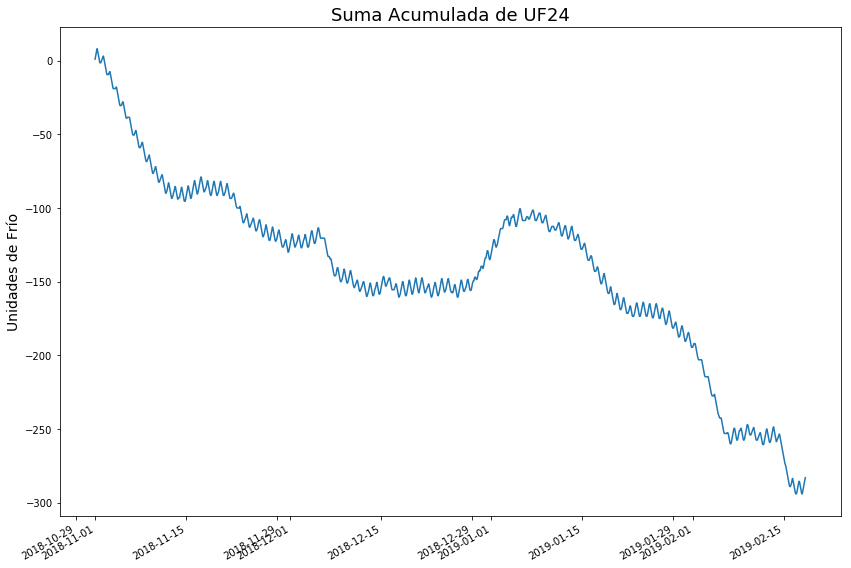

In [13]:

# Quitaremos las columnas de Temperatura del Aire, las Temperaturas mínima y máxima.
# Además quitaremos los duplicados para poder graficar solamente las Unidades de Frío

df3=df.drop(["TempA", "Tmin","Tmax"],1)
df3=df3.drop_duplicates()
f=len(df3)
df3.index = np.arange(0,f)
df3.head()

df2=pd.DataFrame({})
df2['day']=df3.Día
df2['month']=df3.Mes
df2['year']=df3.Año
df2['hour']=df3.Hora
df2.index = np.arange(0,f)
df2.head()
j=pd.to_datetime(df2)

df3["Fecha"]=j
df3["UF24S"]=df3["UF24"].cumsum()

# Ahora podemos graficar.

fig, ax = plt.subplots(figsize=(14, 10))
plt.plot_date(df3.Fecha, df3.UF24S, fmt='')
plt.title("Suma Acumulada de UF24", size=18)
plt.ylabel("Unidades de Frío", size = 14)
fig.autofmt_xdate()
plt.show()

In [14]:
df3.head()

,Hora,Día,Mes,Año,UF24,Fecha,UF24S
0,0,1,11,2018,1.0,2018-11-01 00:00:00,1.0
1,1,1,11,2018,1.0,2018-11-01 01:00:00,2.0
2,2,1,11,2018,1.0,2018-11-01 02:00:00,3.0
3,3,1,11,2018,1.0,2018-11-01 03:00:00,4.0
4,4,1,11,2018,1.0,2018-11-01 04:00:00,5.0
